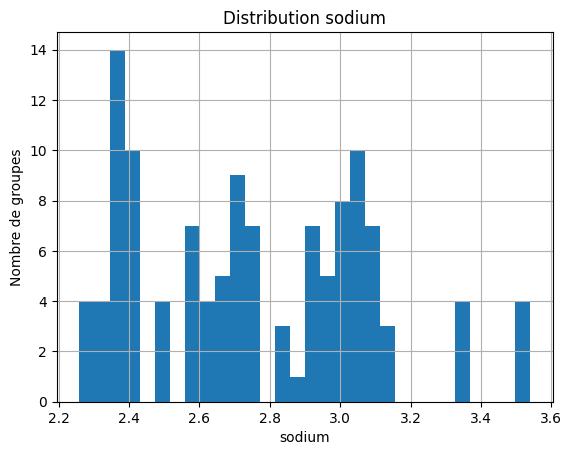

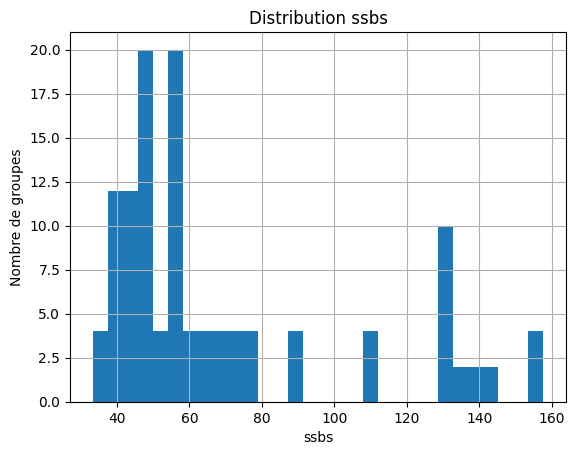

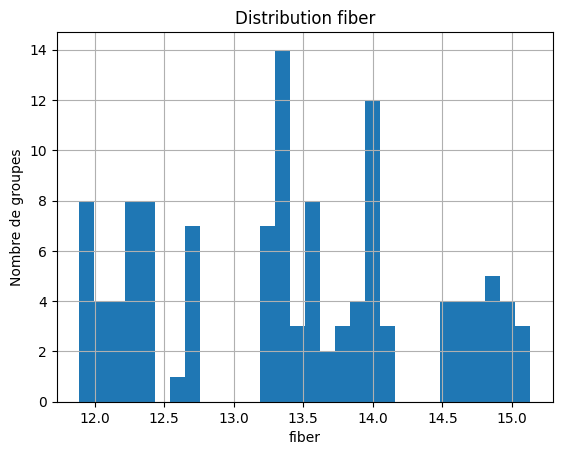

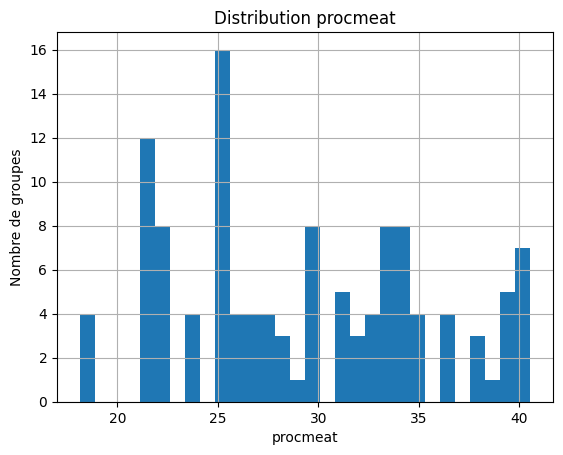

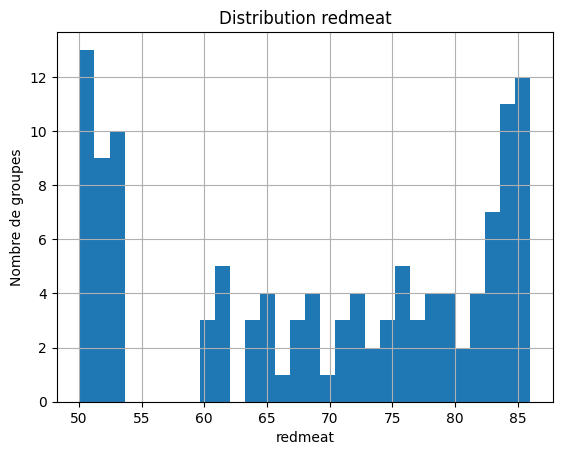

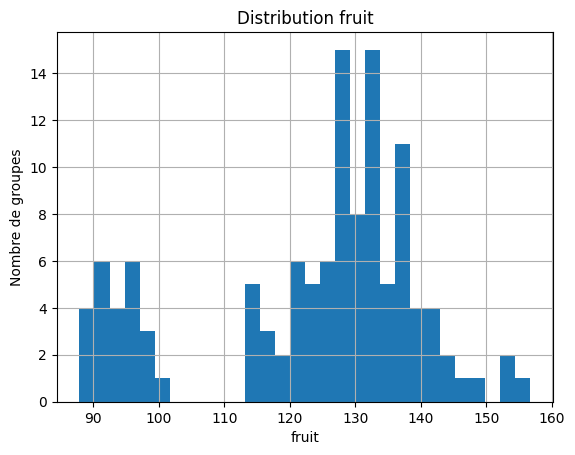

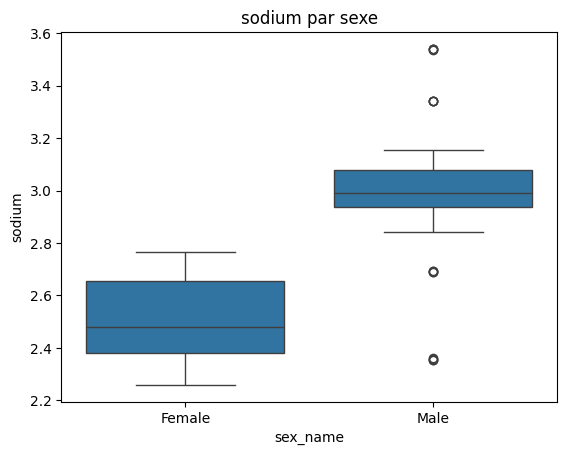

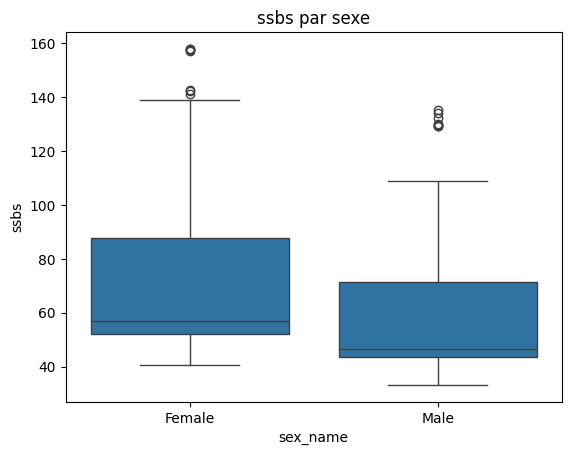

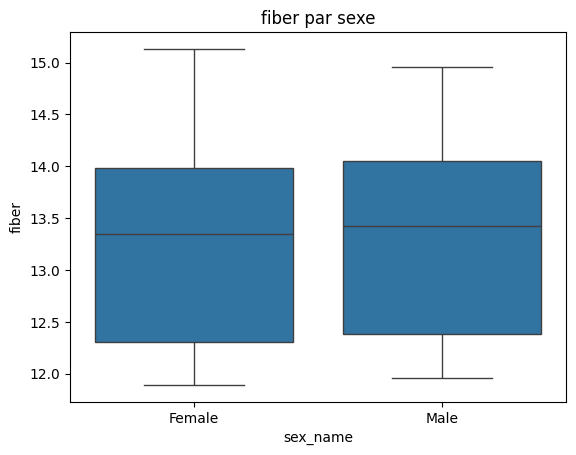

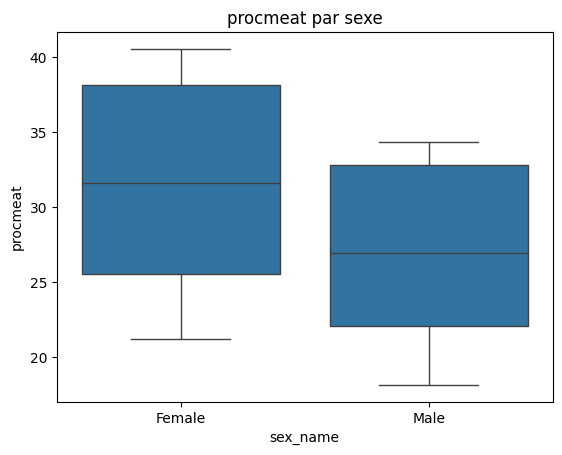

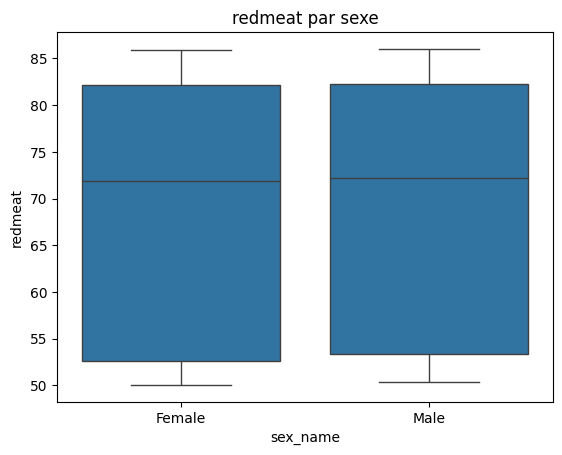

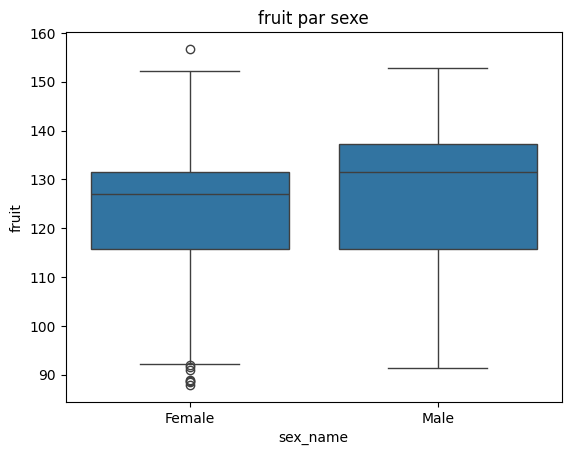

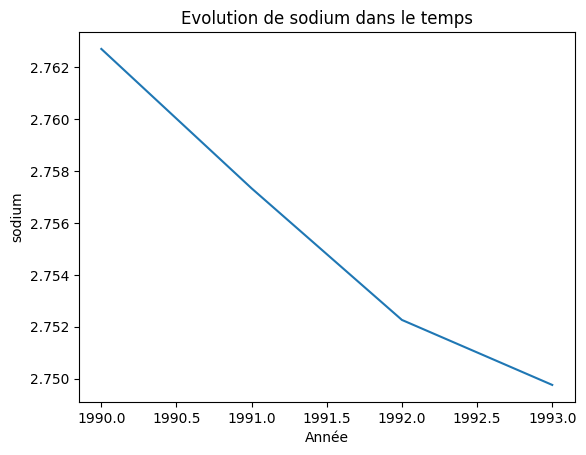

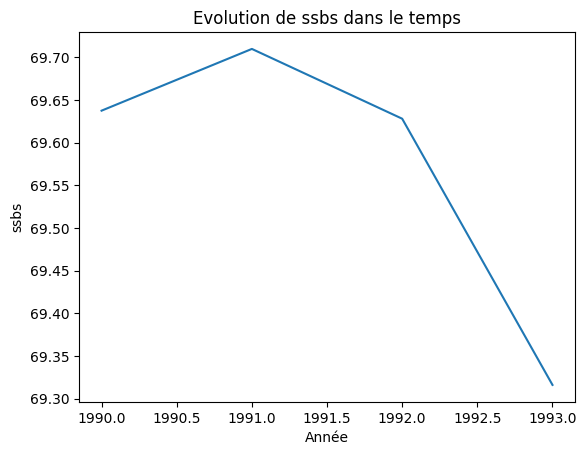

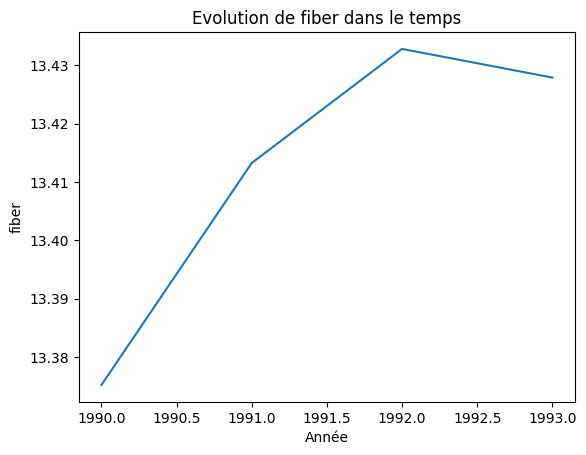

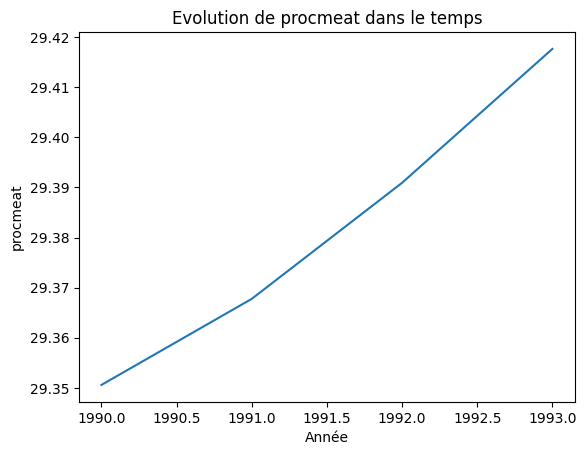

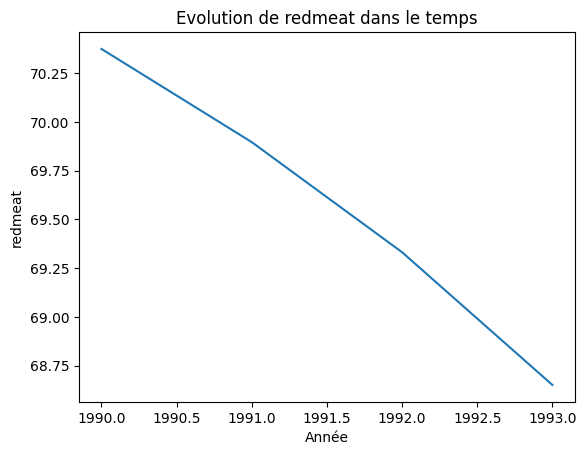

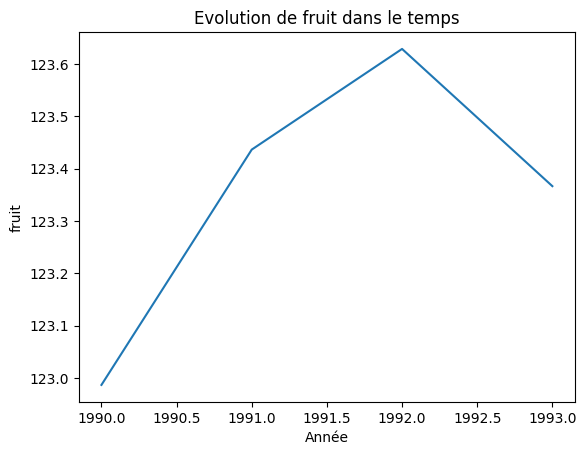

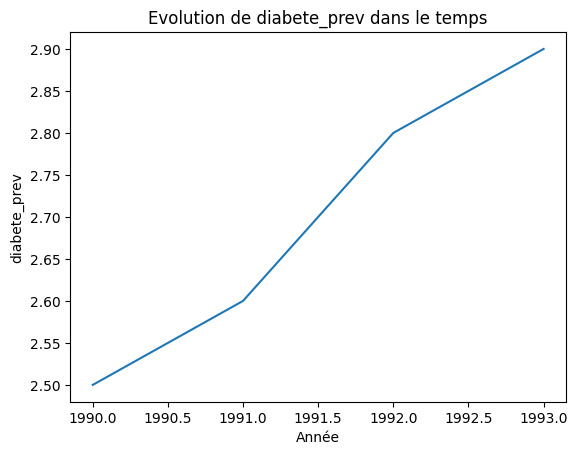

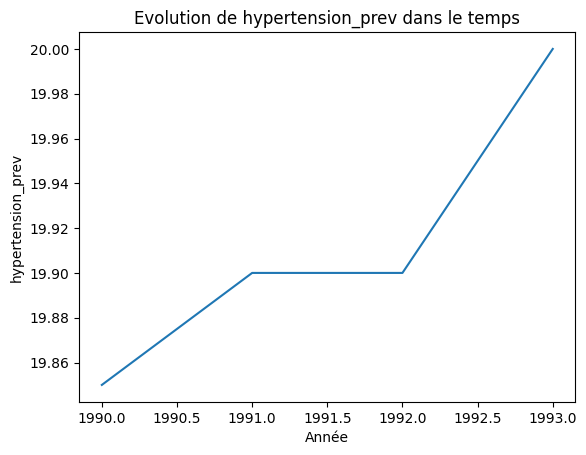

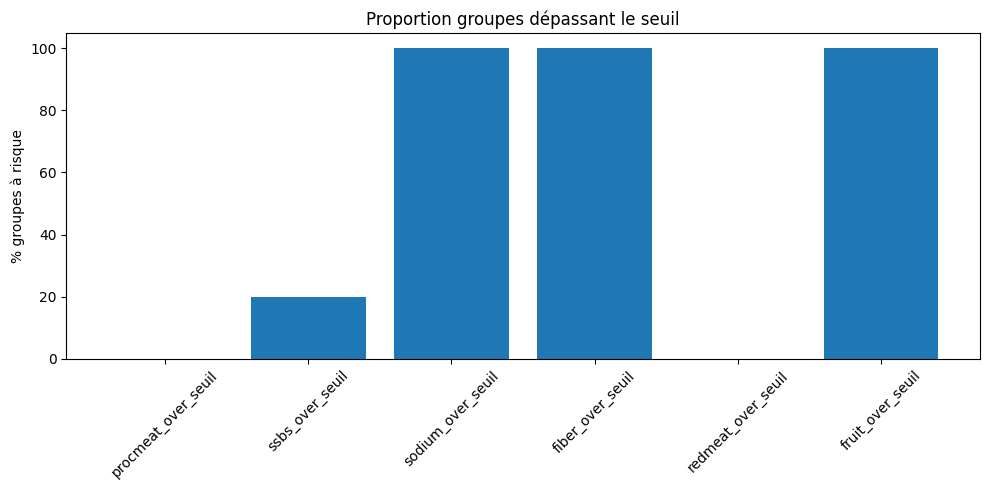

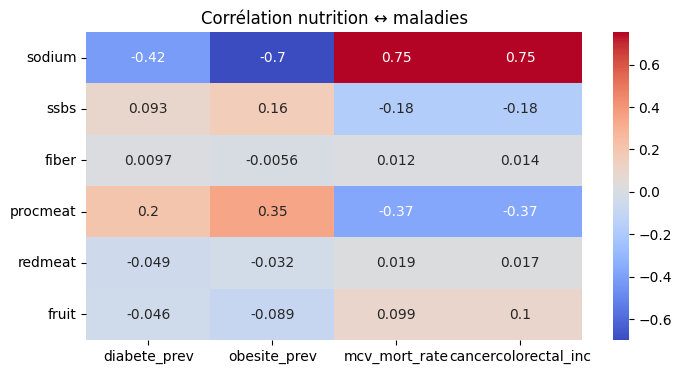

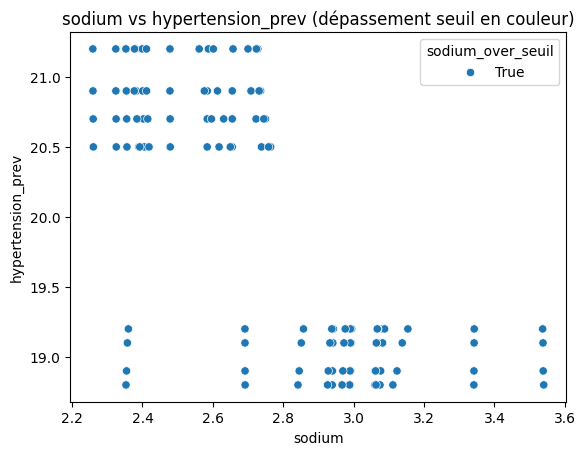

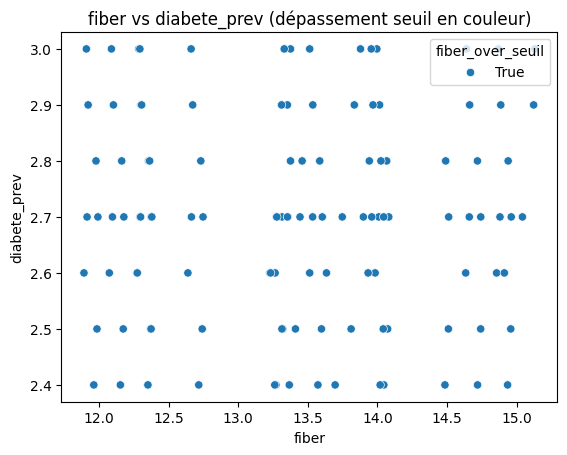

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# kk
# 1. Chargement du fichier (pour Colab/Jupyter)
df = pd.read_csv('/content/france_nutrition_sante_fusionfinal.csv')  # ← Adapter le chemin si besoin

# 2. Histogrammes nutrition
vars_nutri = ['sodium', 'ssbs', 'fiber', 'procmeat', 'redmeat', 'fruit']
for col in vars_nutri:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f'Distribution {col}')
    plt.xlabel(col)
    plt.ylabel('Nombre de groupes')
    plt.show()
    plt.close()

# 3. Boxplots par sexe
for col in vars_nutri:
    if 'sex_name' in df.columns:
        plt.figure()
        sns.boxplot(x='sex_name', y=col, data=df)
        plt.title(f'{col} par sexe')
        plt.show()
        plt.close()

# 4. Courbes d’évolution temporelle
if 'year_id' in df.columns:
    df_grouped = df.groupby('year_id').mean(numeric_only=True)
    for col in ['sodium', 'ssbs', 'fiber', 'procmeat', 'redmeat', 'fruit', 'diabete_prev', 'hypertension_prev']:
        if col in df_grouped.columns:
            plt.figure()
            plt.plot(df_grouped.index, df_grouped[col])
            plt.title(f'Evolution de {col} dans le temps')
            plt.xlabel('Année')
            plt.ylabel(col)
            plt.show()
            plt.close()

# 5. Barplot % groupes à risque
cols_risque = [col for col in df.columns if col.endswith('_over_seuil')]
pourcent_risque = [df[col].mean()*100 for col in cols_risque]
plt.figure(figsize=(10,5))
plt.bar(cols_risque, pourcent_risque)
plt.xticks(rotation=45)
plt.ylabel("% groupes à risque")
plt.title("Proportion groupes dépassant le seuil")
plt.tight_layout()
plt.show()
plt.close()

# 6. Heatmap corrélation nutrition ↔ maladies
cols_sante = ['diabete_prev', 'obesite_prev', 'mcv_mort_rate', 'cancercolorectal_inc']
corrs = df[vars_nutri + cols_sante].corr().loc[vars_nutri, cols_sante]
plt.figure(figsize=(8, 4))
sns.heatmap(corrs, annot=True, cmap='coolwarm')
plt.title("Corrélation nutrition ↔ maladies")
plt.show()
plt.close()

# 7. Scatterplots nutrition ↔ maladies (exemples)
scatter_pairs = [('sodium', 'hypertension_prev'), ('fiber', 'diabete_prev')]
for x, y in scatter_pairs:
    if x in df.columns and y in df.columns:
        plt.figure()
        color = f"{x}_over_seuil" if f"{x}_over_seuil" in df.columns else None
        sns.scatterplot(x=x, y=y, hue=color, data=df)
        plt.title(f"{x} vs {y} (dépassement seuil en couleur)")
        plt.show()
        plt.close()
